<a href="https://colab.research.google.com/github/Randasabag/Etude-de-march-de-la-poule-qui-chante-avec-Python/blob/main/projet9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='indianred'> LA POULE QUI CHANTE </font>
##MISSION : Analyse pour le lancement à l’international en groupant les pays à cibler pour exporter nos poulets

1ère partie : Prétraitement des données


2ème partie : Analyse  
<li>ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus</li>
<li>Méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering et analyse des centroides des classes</li>
<li>Classification ascendante hiérarchique avec un dendrogramme comme visualisation</li>


# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation des jeux de données</a>
 
**Partie 2 : Analyse des jeux de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes des jeux de données </a>
 - <a href="#C4">Affichage des informations des jeux de données </a>
 - <a href="#C5">Analyse des valeurs manquantes</a>
 - <a href="#C6">Unicité de la clé primaire</a>
 - <a href="#C7">Analyse des doublons</a>
 - <a href="#C8">Jointure des tables</a>
 - <a href="#C9">Indicateurs choisis</a>



**Partie 3 : Analyse univariée des indicateurs**
 - <a href="#C10">Disponibilité alimentaire en quantité (kg/personne/an)</a>
 - <a href="#C11">Importations</a>
 - <a href="#C12">Production</a>


# **<font color='indianred'>Partie 1 : Importation des données</font>**

# <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

# <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [ ]:
uploaded = files.upload()

Saving DisponibiliteAlimentaire_2017.csv to DisponibiliteAlimentaire_2017.csv
Saving pibindice.csv to pibindice.csv
Saving Population_2000_2018.csv to Population_2000_2018.csv


In [ ]:
#Disponibilité alimentaire pour l'année 2017
df_dispo=pd.read_csv(io.BytesIO(uploaded['DisponibiliteAlimentaire_2017.csv'])) 
df_dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [ ]:
#Population entre les années 2000 et 2018
df_pop=pd.read_csv(io.BytesIO(uploaded['Population_2000_2018.csv'])) 
df_pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [ ]:
#Tableau regroupant les données sur le PIB/habitant et l'indice de stabilité politique
df_pibind=pd.read_csv(io.BytesIO(uploaded['pibindice.csv'])) 
df_pibind.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12701.30,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.00,X,Sources internationales sûres,NaN


##<font color='purple'>Préparation des données</font>

### Table Disponibilité Alimentaire

In [ ]:
#La table Disponibilité Alimentaire contient des données pour l'année 2017
#Garder la viande de volailles 
df_dispovol=df_dispo[df_dispo['Produit']=='Viande de Volailles']     
#renomme la colonne zone par pays
df_dispovol=df_dispovol.rename(columns={'Zone':'Pays'})   
df_dispovol.head()

,Code Domaine,Domaine,Code zone,Pays,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [ ]:
df_dispovol=df_dispovol[['Pays', 'Élément', 'Unité', 'Valeur']]
df_dispovol.head()

,Pays,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.0
653,Afghanistan,Variation de stock,Milliers de tonnes,0.0
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.0
655,Afghanistan,Pertes,Milliers de tonnes,2.0


In [ ]:
df_dispovol=df_dispovol.pivot_table(index='Pays', columns='Élément', values='Valeur', aggfunc=sum)
df_dispovol.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [ ]:
df_dispovol=df_dispovol.reset_index()
df_dispovol=df_dispovol[['Pays', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité intérieure', 'Exportations - Quantité',	'Importations - Quantité', 'Production', 'Variation de stock']]
df_dispovol.head(2)

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0


### Table Population

In [ ]:
#Garder l'année 2017 
df_pop2017=df_pop[df_pop['Année']==2017]        
df_pop2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [ ]:
df_pop2017=df_pop2017[['Zone', 'Unité', 'Valeur']]
df_pop2017.head()

,Zone,Unité,Valeur
17,Afghanistan,1000 personnes,36296.113
36,Afrique du Sud,1000 personnes,57009.756
55,Albanie,1000 personnes,2884.169
74,Algérie,1000 personnes,41389.189
93,Allemagne,1000 personnes,82658.409


In [ ]:
#renomme la colonne zone par pays
df_pop2017=df_pop2017.rename(columns={'Zone':'Pays', 'Valeur':'Population'}) 
df_pop2017.head()

,Pays,Unité,Population
17,Afghanistan,1000 personnes,36296.113
36,Afrique du Sud,1000 personnes,57009.756
55,Albanie,1000 personnes,2884.169
74,Algérie,1000 personnes,41389.189
93,Allemagne,1000 personnes,82658.409


In [ ]:
df_pop2017['Population']=df_pop2017['Population'] * 1000
df_pop2017.head()

,Pays,Unité,Population
17,Afghanistan,1000 personnes,36296113.0
36,Afrique du Sud,1000 personnes,57009756.0
55,Albanie,1000 personnes,2884169.0
74,Algérie,1000 personnes,41389189.0
93,Allemagne,1000 personnes,82658409.0
...,...,...,...
4333,Venezuela (République bolivarienne du),1000 personnes,29402484.0
4352,Viet Nam,1000 personnes,94600648.0
4371,Yémen,1000 personnes,27834819.0
4390,Zambie,1000 personnes,16853599.0


In [ ]:
df_pop2017=df_pop2017[['Pays', 'Population']]
df_pop2017.head()

,Pays,Population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0
...,...,...
4333,Venezuela (République bolivarienne du),29402484.0
4352,Viet Nam,94600648.0
4371,Yémen,27834819.0
4390,Zambie,16853599.0


### Table PIB et Indice de stabilité politique

In [ ]:
#df_pibind.head(2)

In [ ]:
df_pibind=df_pibind.pivot_table(index='Zone', columns='Produit', values='Valeur', aggfunc=sum)
df_pibind.head()

Produit,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
Zone,,
Afghanistan,2058.4,-2.80
Afrique du Sud,12701.3,-0.28
Albanie,12771.0,0.38
Algérie,11737.4,-0.92
Allemagne,52952.9,0.59


In [ ]:
df_pibind=df_pibind.reset_index()
#renomme la colonne zone par pays
df_pibind=df_pibind.rename(columns={'Zone':'Pays'}) 
df_pibind.head()

Produit,Pays,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,2058.4,-2.80
1,Afrique du Sud,12701.3,-0.28
2,Albanie,12771.0,0.38
3,Algérie,11737.4,-0.92
4,Allemagne,52952.9,0.59


# **<font color='indianred'>Partie 2 : Analyse des jeux de données</font>**

# <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes des jeux de données</font></a>

In [ ]:
#nombre de lignes et colonnes
print('Disponibilité alimentaire',df_dispovol.shape)
print('Population',df_pop2017.shape)
print('PIB_Indice',df_pibind.shape)

Disponibilité alimentaire (172, 7)
Population (236, 2)
PIB_Indice (198, 3)


# <a name="C4"><font color='LightSeaGreen'>Affichage des informations des jeux de données</font></a>

In [ ]:
print('Table Disponibilité Alimentaire')
df_dispovol.info()
print('\n')
print('Table Population')
print('-------------------------------------')
df_pop2017.info()
print('\n')
print('Table PIB Indice')
print('-------------------------------------')
df_pibind.info()

Table Disponibilité Alimentaire
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Pays                                                    172 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
 2   Disponibilité intérieure                                170 non-null    float64
 3   Exportations - Quantité                                 135 non-null    float64
 4   Importations - Quantité                                 170 non-null    float64
 5   Production                                              168 non-null    float64
 6   Variation de stock                                      169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


Table Population
----------------------------

# <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [ ]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [ ]:
#Appel de la fonction val_manq 
#Affichage des pourcentages de valeurs manquantes des 2 jeux de données 
print('1-Table disponibilité alimentaire :')
val_manq(df_dispovol)
print('---------------------------------------')
print('2-Table population :')
val_manq(df_pop2017)
print('---------------------------------------')
print('3-Table PIB Indice :')
val_manq(df_pibind)

1-Table disponibilité alimentaire :
Nombre de valeurs manquantes = 48
Nombre de cellulles totales = 1204
Pourcentage de valeurs manquantes =  3.99 %




Pourcentage de valeurs manquantes par variable/colonne =
 Élément
Pays                                                       0
Disponibilité alimentaire en quantité (kg/personne/an)     0
Disponibilité intérieure                                   2
Importations - Quantité                                    2
Variation de stock                                         3
Production                                                 4
Exportations - Quantité                                   37
dtype: int64


---------------------------------------
2-Table population :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 472
Pourcentage de valeurs manquantes =  0.0 %




Pourcentage de valeurs manquantes par variable/colonne =
 Pays          0
Population    0
dtype: int64


---------------------------------------
3-Table PIB Indice 

##<font color='purple'>Affichage des valeurs manquantes et affectation de valeurs</font>

In [ ]:
#affiche le df avec au moins une valeur manquante par ligne
df_dispovol_null = df_dispovol[df_dispovol.isnull().any(axis=1)]
df_dispovol_null

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
13,Bahamas,43.17,26.0,NaN,24.0,6.0,4.0
14,Bangladesh,1.50,250.0,NaN,0.0,249.0,0.0
23,Burkina Faso,2.27,46.0,NaN,0.0,46.0,0.0
26,Cabo Verde,17.62,10.0,NaN,12.0,1.0,4.0
27,Cambodge,2.34,38.0,NaN,10.0,28.0,0.0
40,Cuba,23.72,342.0,NaN,312.0,29.0,-1.0
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
54,Gambie,3.53,8.0,NaN,16.0,2.0,10.0
56,Grenade,45.70,8.0,NaN,7.0,1.0,0.0


In [ ]:
df_dispovol_null['Exportations - Quantité']=df_dispovol_null['Production']+df_dispovol_null['Importations - Quantité']+df_dispovol_null['Variation de stock']-df_dispovol_null['Disponibilité intérieure']
df_dispovol_null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
13,Bahamas,43.17,26.0,8.0,24.0,6.0,4.0
14,Bangladesh,1.50,250.0,-1.0,0.0,249.0,0.0
23,Burkina Faso,2.27,46.0,0.0,0.0,46.0,0.0
26,Cabo Verde,17.62,10.0,7.0,12.0,1.0,4.0
27,Cambodge,2.34,38.0,0.0,10.0,28.0,0.0
40,Cuba,23.72,342.0,-2.0,312.0,29.0,-1.0
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
54,Gambie,3.53,8.0,20.0,16.0,2.0,10.0
56,Grenade,45.70,8.0,0.0,7.0,1.0,0.0


In [ ]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0
113,Ouzbékistan,1.96,NaN,NaN,NaN,NaN,NaN
122,Pérou,13.47,1523.0,NaN,60.0,1465.0,NaN
130,République démocratique populaire lao,10.91,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0
113,Ouzbékistan,1.96,NaN,NaN,NaN,NaN,NaN
122,Pérou,13.47,1523.0,NaN,60.0,1465.0,NaN
130,République démocratique populaire lao,10.91,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Affectation des valeurs manquantes par les valeurs trouvées dans mes recherches
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Pérou','Exportations - Quantité'] = 1
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Pérou','Importations - Quantité'] = 60
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Pérou','Variation de stock'] = 0
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Importations - Quantité'] = 8
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Disponibilité intérieure'] = 67
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Production'] = 58
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Variation de stock'] = -2
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Ouzbékistan','Exportations - Quantité'] = 0
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Djibouti','Importations - Quantité'] = 3
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'Maldives','Importations - Quantité'] = 12
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Importations - Quantité'] = 5
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Production'] = 33
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Variation de stock'] = 0
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Disponibilité intérieure'] = 38
df_dispovol_null.loc[df_dispovol_null['Pays'] == 'République démocratique populaire lao','Exportations - Quantité'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0


In [ ]:
#Il reste toujours 4 valeurs manquantes pour l'exportation et la production des Maldives et Djibouti 
#que je vais remplacer par 0
df_dispovol_null=df_dispovol_null.fillna(0)
df_dispovol_null.head()

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
13,Bahamas,43.17,26.0,8.0,24.0,6.0,4.0
14,Bangladesh,1.50,250.0,-1.0,0.0,249.0,0.0
23,Burkina Faso,2.27,46.0,0.0,0.0,46.0,0.0
26,Cabo Verde,17.62,10.0,7.0,12.0,1.0,4.0


In [ ]:
df_dispovol_null[df_dispovol_null.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock


In [ ]:
df_dispovol.head()

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,Algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0


In [ ]:
df_dispovol=df_dispovol.dropna()

In [ ]:
df_dispovol=df_dispovol.append(df_dispovol_null)

In [ ]:
df_dispovol[df_dispovol.isnull().any(axis=1)]

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock


In [ ]:
df_dispovol.sort_values(by='Pays', ascending=True).head()

Élément,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,0.0,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,Algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0


In [ ]:
df_pop2017[df_pop2017.isnull().any(axis=1)]

,Pays,Population


Pas de valeur manquante dans la table population

In [ ]:
df_pibind[df_pibind['PIB par habitant, ($ PPA internationaux constants de 2011)'].isna()]

Produit,Pays,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
5,Andorre,NaN,1.42
40,"Chine, Taiwan Province de",NaN,0.86
47,Cuba,NaN,0.65
64,Groenland,NaN,1.92
141,République arabe syrienne,NaN,-2.62
148,République populaire démocratique de Corée,NaN,-0.50
154,Samoa américaines,NaN,1.22
164,Soudan du Sud,NaN,-2.45
185,Venezuela (République bolivarienne du),NaN,-1.25
187,Yémen,NaN,-2.94


In [ ]:
#Affectation des valeurs manquantes par les valeurs trouvées dans mes recherches
df_pibind.loc[df_pibind['Pays'] == 'Andorre','PIB par habitant, ($ PPA internationaux constants de 2011)'] = 56352.2
df_pibind.loc[df_pibind['Pays'] == 'Chine, Taiwan Province de','PIB par habitant, ($ PPA internationaux constants de 2011)'] = 48500.8
df_pibind.loc[df_pibind['Pays'] == 'Samoa américaines','PIB par habitant, ($ PPA internationaux constants de 2011)'] = 5668
df_pibind.loc[df_pibind['Pays'] == 'Soudan du Sud','PIB par habitant, ($ PPA internationaux constants de 2011)'] = 888.8
df_pibind.loc[df_pibind['Pays'] == 'Yémen','PIB par habitant, ($ PPA internationaux constants de 2011)'] = 2150
df_pibind.loc[df_pibind['Pays'] == 'Érythrée','PIB par habitant, ($ PPA internationaux constants de 2011)'] = 1537.5

In [ ]:
#Il reste toujours des valeurs manquantes pour 6 pays pour les 2 variables PIB par habitant et l'indice de Stabilité politique 
#que je vais remplacer par 0
df_pibind=df_pibind.fillna(0)
df_pibind.head()

Produit,Pays,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,2058.4,-2.80
1,Afrique du Sud,12701.3,-0.28
2,Albanie,12771.0,0.38
3,Algérie,11737.4,-0.92
4,Allemagne,52952.9,0.59


In [ ]:
df_pibind[df_pibind.isnull().any(axis=1)]

Produit,Pays,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)


# <a name="C6"><font color='LightSeaGreen'>Unicité de la clé primaire</font></a>

In [ ]:
#Creation d'une fonction qui teste l'unicité d'une colonne
def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable', col, 'n\'est pas une clé primaire')

In [ ]:
cle_primaire(df_dispovol,'Pays')
cle_primaire(df_pop2017,'Pays')
cle_primaire(df_pibind,'Pays')

La variable Pays est une clé primaire
La variable Pays est une clé primaire
La variable Pays est une clé primaire


# <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [ ]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [ ]:
print('------------------') 
print('Table disponibilité alimentaire')
detect_doublons(df_dispovol)
print('------------------') 
print('Table population')
detect_doublons(df_pop2017)
print('------------------') 
print('Table pib indice')
detect_doublons(df_pibind)

------------------
Table disponibilité alimentaire
------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [Pays, Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Production, Variation de stock]
Index: []


------------------
Table population
------------------
La table contient 0 doublons.
(0, 2)


Empty DataFrame
Columns: [Pays, Population]
Index: []


------------------
Table pib indice
------------------
La table contient 0 doublons.
(0, 3)


Empty DataFrame
Columns: [Pays, PIB par habitant, ($ PPA internationaux constants de 2011), Stabilité politique et absence de violence/terrorisme (indice)]
Index: []




# <a name="C8"><font color='LightSeaGreen'>Jointure des tables</font></a>

In [ ]:
#Jointure externe complète entre disponibilité alimentaire et population
df_dispop=pd.merge(df_dispovol, df_pop2017, left_on='Pays', right_on='Pays', how='outer', indicator=True)
df_dispop.head()

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,_merge
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,57009756.0,both
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0,both
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0,both
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,both
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,29816766.0,both


In [ ]:
df_dispop[df_dispop.isnull().any(axis=1)]

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,_merge
172,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,77001.0,right_only
173,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,14584.0,right_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,275186.0,right_only
175,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,105366.0,right_only
176,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,1494076.0,right_only
...,...,...,...,...,...,...,...,...,...
231,Somalie,NaN,NaN,NaN,NaN,NaN,NaN,14589179.0,right_only
232,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,10910763.0,right_only
233,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,right_only
234,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,101998.0,right_only


In [ ]:
#Suppression des pays qui n'ont aucune information dans la table disponibilité alimentaire
df_dispop=df_dispop.drop(df_dispop[df_dispop['_merge']=='right_only'].index)
df_dispop.head()

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,_merge
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,57009756.0,both
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0,both
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0,both
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,both
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,29816766.0,both


In [ ]:
df_dispop[df_dispop.isnull().any(axis=1)]

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,_merge


In [ ]:
#Jointure externe complète entre dispop et la table du PIB et de la stabilité politique
df_final=pd.merge(df_dispop, df_pibind, left_on='Pays', right_on='Pays', how='outer')
df_final

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,_merge,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,57009756.0,both,12701.3,-0.28
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0,both,12771.0,0.38
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0,both,11737.4,-0.92
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,both,52952.9,0.59
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,29816766.0,both,7310.9,-0.33
...,...,...,...,...,...,...,...,...,...,...,...
196,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,888.8,-2.45
197,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6467.1,0.79
198,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3896.7,1.24
199,Érythrée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1537.5,-0.73


In [ ]:
df_final[df_final.isnull().any(axis=1)].head()

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)


In [ ]:
#Suppression des pays qui n'ont aucune information dans la table disponibilité alimentaire
df_final=df_final.dropna()
df_final

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,_merge,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,57009756.0,both,12701.3,-0.28
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0,both,12771.0,0.38
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0,both,11737.4,-0.92
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,both,52952.9,0.59
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,29816766.0,both,7310.9,-0.33
...,...,...,...,...,...,...,...,...,...,...,...
167,Timor-Leste,4.24,5.0,14.0,11.0,1.0,7.0,1243258.0,both,3145.5,0.07
168,Turkménistan,4.52,27.0,4.0,9.0,20.0,2.0,5757667.0,both,14205.0,-0.13
169,Vanuatu,11.66,3.0,3.0,4.0,1.0,1.0,285510.0,both,3081.8,0.70
170,Zimbabwe,4.68,76.0,-1.0,6.0,69.0,0.0,14236595.0,both,3274.6,-0.71


In [ ]:
#suppression de la colonne _merge
df_final=df_final.drop(['_merge'], axis = 1)

In [ ]:
df_final.head()

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0,57009756.0,12701.3,-0.28
1,Albanie,16.36,47.0,0.0,38.0,13.0,4.0,2884169.0,12771.0,0.38
2,Algérie,6.38,277.0,0.0,2.0,275.0,0.0,41389189.0,11737.4,-0.92
3,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0,82658409.0,52952.9,0.59
4,Angola,10.56,319.0,0.0,277.0,42.0,0.0,29816766.0,7310.9,-0.33


In [ ]:
#récupère les lignes où l'exportation est négative
df_final[df_final['Exportations - Quantité']<0]

In [ ]:
#remplace les valeurs négatives de l'exportation par 0
df_final['Exportations - Quantité']=df_final['Exportations - Quantité'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
df_final[df_final['Exportations - Quantité']<0]

,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Population,"PIB par habitant, ($ PPA internationaux constants de 2011)",Stabilité politique et absence de violence/terrorisme (indice)


# <a name="C9"><font color='LightSeaGreen'>Indicateurs choisis</font></a>

1.   Disponibilité d'aliments dans chaque pays en kg/personne/an 
2.   Importations (Milliers de tonnes)
3.   Production (Milliers de tonnes)
4.   Population : si le nombre d'habitants est grand, la probabilité que les habitants consomment du poulet est plus grande, alors il serait plus intéressant d'y envoyer notre poulet 
5.   PIB/Habitant ($) : si le PIB d'un pays est fort, cela indique un niveau economique élevé du pays en moyenne, donc la consommation de poulet pourrait y être plus élevée 
6.   Indice de stabilité politique 
(-2.5 : faible stabilité politique (min) / 2.5 : forte stabilité politique (max)) : une instabilité politique dans un pays empêcherait l'importation de poulet 



# **<font color='indianred'>Partie 3 : Analyse univariée des indicateurs</font>**

# <a name="C10"><font color='LightSeaGreen'>Disponibilité alimentaire en quantité (kg/personne/an)</font></a>

<function matplotlib.pyplot.show>

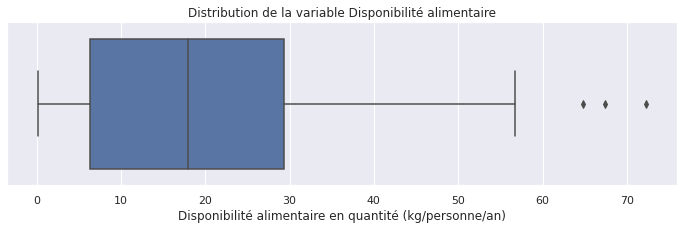

In [101]:
#Représentation la variable Disponibilité alimentaire sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["Disponibilité alimentaire en quantité (kg/personne/an)"], color="b")
plt.title('Distribution de la variable Disponibilité alimentaire')
plt.savefig("distribution_dispo_al_boxplot.png")
plt.show

In [102]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
#1er quartile
q1 = df_final['Disponibilité alimentaire en quantité (kg/personne/an)'].quantile(0.25)
#3eme quartile
q3 = df_final['Disponibilité alimentaire en quantité (kg/personne/an)'].quantile(0.75)
#écart interquatile
iqr = q3 - q1
print('Ecart interquatile =', round(iqr,2))
seuil_min = q1 -(1.5 * iqr) 
seuil_max = q3 +(1.5 * iqr)
print('Seuil minimum =', round(seuil_min,2))
print('Seuil maximum =', round(seuil_max,2))
#affiche le dataframe final sans outliers
df_out = df_final[(df_final['Disponibilité alimentaire en quantité (kg/personne/an)'] > seuil_min) & (df_final['Disponibilité alimentaire en quantité (kg/personne/an)'] < seuil_max)]
#trie par ordre croissant les donnees du df web sans outliers via la colonne 'disponibilité alimentaire' 
#df_out.sort_values('Disponibilité alimentaire en quantité (kg/personne/an)', ascending=True).head()
#dataframe des outliers
dfo = df_final[(df_final['Disponibilité alimentaire en quantité (kg/personne/an)'] < seuil_min) | (df_final['Disponibilité alimentaire en quantité (kg/personne/an)'] > seuil_max)]
#liste des outliers
liste_out=(dfo['Disponibilité alimentaire en quantité (kg/personne/an)'].tolist())
print('Nombre doutliers:', len(liste_out))
print('Liste des outliers :', liste_out)
print('\n')
#affichage des outliers 
dfo[['Pays','Disponibilité alimentaire en quantité (kg/personne/an)']].sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)', ascending=True)

Ecart interquatile = 22.95
Seuil minimum = -28.04
Seuil maximum = 63.76
Nombre doutliers: 3
Liste des outliers : [67.39, 64.77, 72.31]




,Pays,Disponibilité alimentaire en quantité (kg/personne/an)
106,Samoa,64.77
59,Israël,67.39
162,Saint-Vincent-et-les Grenadines,72.31


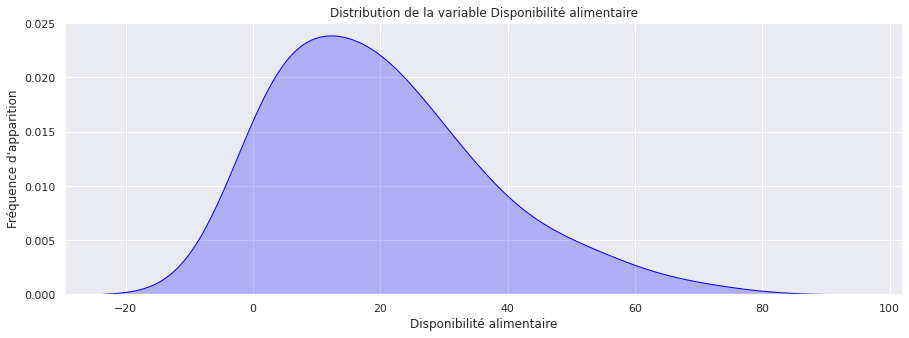

In [96]:
#distribution de la variable disponibilité alimentaire sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Disponibilité alimentaire en quantité (kg/personne/an)'], shade=True, bw_method=0.5, color="blue")
plt.title('Distribution de la variable Disponibilité alimentaire')
plt.xlabel('Disponibilité alimentaire')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_dispo_al.png")
plt.show()

# <a name="C11"><font color='LightSeaGreen'>Importations - Quantité</font></a>

<function matplotlib.pyplot.show>

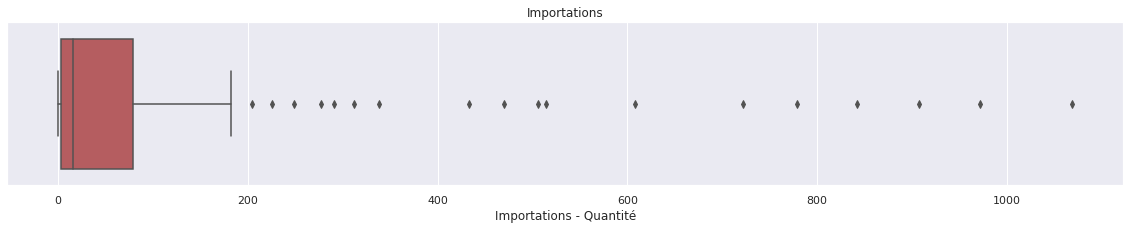

In [100]:
#utilisation de la librairie Seaborn pour representer la variable disponibilité alimentaire sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["Importations - Quantité"], color="r")
plt.title('Importations')
plt.savefig("distribution_import_boxplot.png")
plt.show

In [103]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
#1er quartile
q1 = df_final['Importations - Quantité'].quantile(0.25)
#3eme quartile
q3 = df_final['Importations - Quantité'].quantile(0.75)
#écart interquatile
iqr = q3 - q1
print('Ecart interquatile =', round(iqr,2))
seuil_min = q1 -(1.5 * iqr) 
seuil_max = q3 +(1.5 * iqr)
print('Seuil minimum =', round(seuil_min,2))
print('Seuil maximum =', round(seuil_max,2))
#affiche le dataframe final sans outliers
df_out = df_final[(df_final['Importations - Quantité'] > seuil_min) & (df_final['Importations - Quantité'] < seuil_max)]
#trie par ordre croissant les donnees du df sans outliers via la colonne 'Importations - Quantité' 
#df_out.sort_values('Disponibilité alimentaire en quantité (kg/personne/an)', ascending=True).head()

#dataframe des outliers
dfo = df_final[(df_final['Importations - Quantité'] < seuil_min) | (df_final['Importations - Quantité'] > seuil_max)]
#liste des outliers
liste_out=(dfo['Importations - Quantité'].tolist())
print('Nombre doutliers:', len(liste_out))
print('Liste des outliers :', liste_out)
print('\n')
#affichage des outliers 
dfo[['Pays','Importations - Quantité']].sort_values(by='Importations - Quantité', ascending=True)

Ecart interquatile = 76.0
Seuil minimum = -111.0
Seuil maximum = 193.0
Nombre doutliers: 18
Liste des outliers : [514.0, 842.0, 277.0, 722.0, 338.0, 907.0, 205.0, 506.0, 226.0, 470.0, 1069.0, 972.0, 608.0, 249.0, 779.0, 291.0, 433.0, 312.0]




,Pays,Importations - Quantité
38,Espagne,205.0
44,Fédération de Russie,226.0
94,Philippines,249.0
4,Angola,277.0
126,Viet Nam,291.0
140,Cuba,312.0
13,Belgique,338.0
130,Émirats arabes unis,433.0
56,Iraq,470.0
43,France,506.0


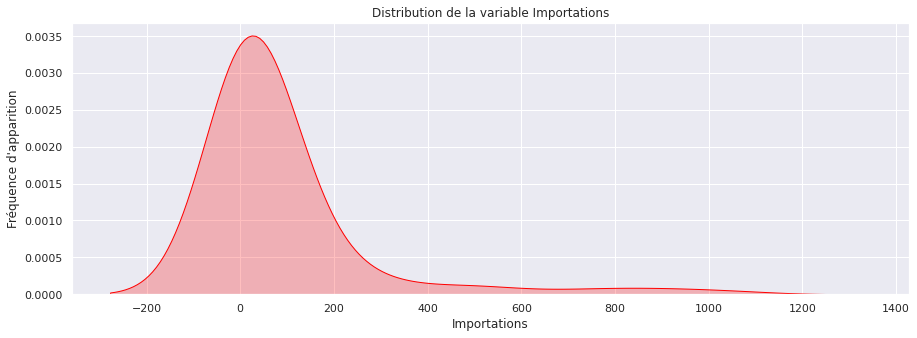

In [107]:
#distribution de la variable importation sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Importations - Quantité'], shade=True, bw_method=0.5, color="red")
plt.title('Distribution de la variable Importations')
plt.xlabel('Importations')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_import.png")
plt.show()

# <a name="C12"><font color='LightSeaGreen'>Production</font></a>

<function matplotlib.pyplot.show>

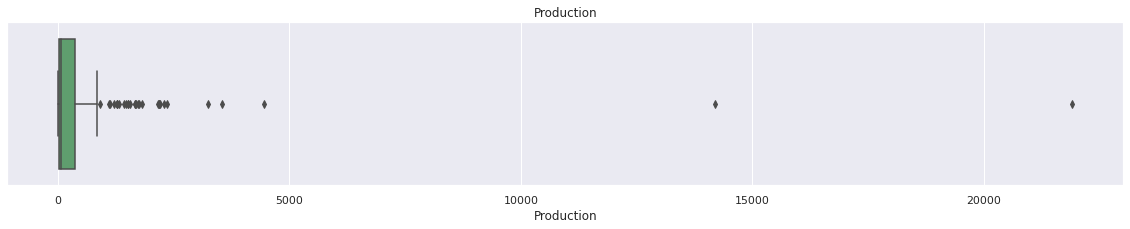

In [108]:
#utilisation de la librairie Seaborn pour representer la variable production sous forme de boxplot
plt.figure(figsize=(20, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_final["Production"], color="g")
plt.title('Production')
plt.savefig("distribution_prod_boxplot.png")
plt.show

In [109]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
#1er quartile
q1 = df_final['Production'].quantile(0.25)
#3eme quartile
q3 = df_final['Production'].quantile(0.75)
#écart interquatile
iqr = q3 - q1
print('Ecart interquatile =', round(iqr,2))
seuil_min = q1 -(1.5 * iqr) 
seuil_max = q3 +(1.5 * iqr)
print('Seuil minimum =', round(seuil_min,2))
print('Seuil maximum =', round(seuil_max,2))
#affiche le dataframe final sans outliers
df_out = df_final[(df_final['Production'] > seuil_min) & (df_final['Production'] < seuil_max)]
#trie par ordre croissant les donnees du df sans outliers via la colonne 'Importations - Quantité' 
#df_out.sort_values('Disponibilité alimentaire en quantité (kg/personne/an)', ascending=True).head()

#dataframe des outliers
dfo = df_final[(df_final['Production'] < seuil_min) | (df_final['Production'] > seuil_max)]
#liste des outliers
liste_out=(dfo['Production'].tolist())
print('Nombre doutliers:', len(liste_out))
print('Liste des outliers :', liste_out)
print('\n')
#affichage des outliers 
dfo[['Pays','Production']].sort_values(by='Production', ascending=True)

Ecart interquatile = 347.0
Seuil minimum = -506.5
Seuil maximum = 881.5
Nombre doutliers: 30
Liste des outliers : [1667.0, 1514.0, 2161.0, 1269.0, 14201.0, 1417.0, 1564.0, 1515.0, 1750.0, 4444.0, 3545.0, 2301.0, 2174.0, 1315.0, 2215.0, 1724.0, 3249.0, 1662.0, 1281.0, 1100.0, 1272.0, 2351.0, 1814.0, 1676.0, 2192.0, 1211.0, 918.0, 1118.0, 21914.0, 1465.0]




,Pays,Production
126,Viet Nam,918.0
93,Pays-Bas,1100.0
129,Égypte,1118.0
123,Ukraine,1211.0
9,Australie,1269.0
94,Philippines,1272.0
90,Pakistan,1281.0
60,Italie,1315.0
23,Canada,1417.0
158,Pérou,1465.0


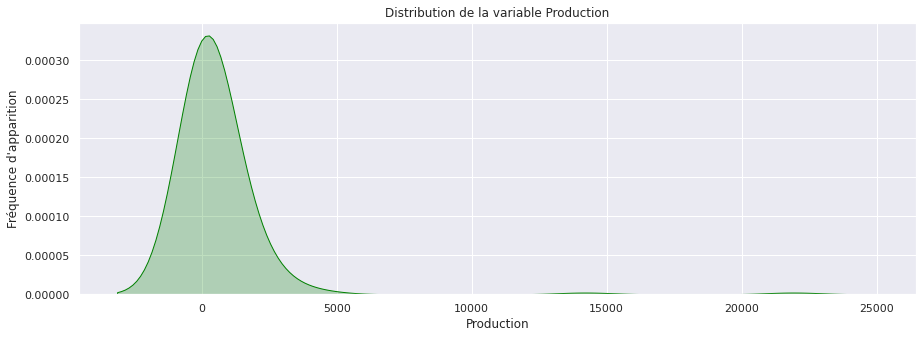

In [112]:
#distribution de la variable importation sous forme de courbe
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
sns.kdeplot(df_final['Production'], shade=True, bw_method=0.5, color="green")
plt.title('Distribution de la variable Production')
plt.xlabel('Production')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_prod.png")
plt.show()